<a href="https://colab.research.google.com/github/BartBennett/SimStudent/blob/main/Sim_2_Homework_1_Answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SIMULATION 2
##HOMEWORK 1: Queues

Due: In class on Friday, May 26, 2023

Name: Your name here

Overall score: 22 / 22 pts

#### 1.	[12 points] In this problem, we will explore what happens when a different probability distribution is used for the interarrival time. In each case, let the mean service time ($\frac{1}{μ}$) be 1.0, the service time distribution be exponential, and the number of servers (s) be one. Also, use a random number seed of 118 and run the simulation for 1,000 time units.

a) Change the queueing simulation we developed in class to a Python function of λ and μ (these are rates!) with the values of L, W, Lq, Wq, and ρ returned by the function. Use the exponential distribution for the interarrival time, fill out this table and put your code below. [4 points]

$\frac{1}{λ}$  |L     |W      |Lq     |Wq    |ρ                    
---------------|-------|-------|-------|-------|-------
2.00           |       |       |       |       |        
1.50           |       |       |       |       |           
1.10           |       |       |       |       |       
1.05           |       |       |       |       |          

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def Customer_Arrival():
  global servers_idle_time
  #Change system state
  number_in_the_system.append(number_in_the_system[-1]+1)
  #Create record for customer just arriving
  customers.append(customer(event_queue[0].customer_ID, sim_time[-1], 0, 0))
  #Schedule the arrival for the next customer
  event_queue.append(event(sim_time[-1] + np.random.exponential(arrival_time), "Arrival", event_queue[0].customer_ID+1))
  #Arrival and immediate service
  if number_in_the_system[-1] <= servers:
    #print("Time: ", sim_time[-1], " Arrival with immediate service: ", event_queue[0].customer_ID)
    #Add the service_time to the customer's record
    customers[-1].service_time = sim_time[-1]
    #Schedule this customer's departure
    depart_time = sim_time[-1] + np.random.exponential(service_time)
    #print("    Customer", event_queue[0].customer_ID, "expected departure",depart_time)
    event_queue.append(event(depart_time, "Departure", event_queue[0].customer_ID))
    #Calculate idle time for serevers for every customer except the first
    if len(customers) > 1:
      servers_idle_time += (sim_time[-1] - sim_time[-2]) * (servers - number_in_the_system[-2])
  #Arrival and wait in the queue
  else:
    #print("Time: ", sim_time[-1], " Arrival, waiting in queue: ", event_queue[0].customer_ID)
    #Add customer to queue
    queue.append(event_queue[0].customer_ID)
    #Increment the number in the queue
    number_in_the_queue.append(number_in_the_queue[-1]+1)
    #Add the sim_time for plotting the queue length
    queue_time.append(sim_time[-1])

def Customer_Departure():
  global servers_idle_time
  #Change system state
  number_in_the_system.append(number_in_the_system[-1]-1)
  #Add the deparure time to the customer's record
  customers[event_queue[0].customer_ID].departure_time = sim_time[-1]
  #Departure with the next person in the queue served
  if number_in_the_system[-1] >= servers:
    #print("Time: ", sim_time[-1], " Departure: ", event_queue[0].customer_ID, " Serving: ", queue[0])
    #Add service time for customer who was in the queue
    customers[int(queue[0])].service_time = sim_time[-1]
    #Schedule the departure for this customer
    event_queue.append(event(sim_time[-1] + np.random.exponential(service_time), "Departure", queue[0]))
    #Remove this customer from the queue
    del queue[0]
    #Decrement the number in the queue
    number_in_the_queue.append(number_in_the_queue[-1]-1)
    #Add the sim_time for plotting the queue length
    queue_time.append(sim_time[-1])
  #Departure with the next person with no one in the queue
  else:
    #print("Time: ", sim_time[-1], " Departure: ", event_queue[0].customer_ID, " system empty")
    #Calculate idle time
    servers_idle_time += (sim_time[-1] - sim_time[-2]) * (servers - number_in_the_system[-2])

#system state
number_in_the_system = []
number_in_the_system.append(0)

#entity attributes
class customer:
  def __init__(self, customer_ID, arrival_time, service_time, departure_time):
    self.customer_ID = int(customer_ID)
    self.arrival_time = arrival_time
    self.service_time = service_time
    self.departure_time = departure_time
customers = []
arrival_time = 1.05

#resource
servers = 1
service_time = 1.0
servers_idle_time = 0

#events
class event:
  def __init__(self, sim_time, event_type, customer_ID):
    self.sim_time = sim_time
    self.event_type = event_type
    self.customer_ID = int(customer_ID)

event_queue = []
event_queue.append(event(np.random.exponential(arrival_time), "Arrival", 0))
servers_idle_time = event_queue[0].sim_time * servers

#sets
queue = []
number_in_the_queue = []
number_in_the_queue.append(0)
queue_time = []
queue_time.append(0)

#timing
max_time = 1000
sim_time = []
sim_time.append(0)

np.random.seed(118)

while event_queue[0].sim_time <= max_time:
  sim_time = np.append(sim_time, event_queue[0].sim_time)
  match event_queue[0].event_type:
    case 'Arrival':
      Customer_Arrival()
    case 'Departure':
      Customer_Departure()
  #Delete event just processed
  del event_queue[0]
  #Sort the event queue
  event_queue.sort(key = lambda x : x.sim_time)

last_arrived = customers[-1].customer_ID
last_served = last_arrived
while customers[last_served].service_time == 0:
  last_served -= 1
last_departed = last_served
while customers[last_departed].departure_time == 0:
  last_departed -= 1

sum_person_time = sum(customers[c].departure_time - customers[c].arrival_time for c in range(0,last_departed))
sum_person_queue_time = sum(customers[c].service_time - customers[c].arrival_time for c in range(0,last_served))
print("For arrival time", arrival_time, "and service time", service_time)
print("L = %5.2f" % (sum_person_time/customers[last_departed].departure_time))
print("Lq = %5.2f" % (sum_person_queue_time/customers[last_served].service_time))
print("W = %5.2f" % (sum_person_time/last_departed))
print("Wq = %5.2f" % (sum_person_queue_time/last_served))
print("rho = %5.2f" % (1 - servers_idle_time/max_time/servers))

For arrival time 1.05 and service time 1.0
L =  8.63
Lq =  7.71
W =  8.91
Wq =  7.95
rho =  0.92


For arrival time 2 and service time 1.0\
L =  0.86\
Lq =  0.37\
W =  1.63\
Wq =  0.70\
rho =  0.49\
\
For arrival time 1.5 and service time 1.0\
L =  1.93\
Lq =  1.24\
W =  2.73\
Wq =  1.77\
rho =  0.68\
\
For arrival time 1.1 and service time 1.0\
L = 17.30\
Lq = 16.33\
W = 17.77\
Wq = 16.76\
rho =  0.97\
\
For arrival time 1.05 and service time 1.0\
L =  8.63\
Lq =  7.71\
W =  8.91\
Wq =  7.95\
rho =  0.92   

$\frac{1}{λ}$  |L     |W      |Lq     |Wq    |ρ                    
---------------|-------|-------|-------|-------|-------
2.00           |0.68| 1.63| 0.37| 0.70|0.49
1.50           |1.93| 2.73| 1.24| 1.77|0.68       
1.10           |17.31|17.77|16.33|16.67|0.97
1.05           | 8.63| 8.91| 7.71| 7.95|0.92

Note: Is seems odd that the number do not appear to be monotonic.  What is happening is as you get closer and closer to where the arrival time = service time, the number in the system will eventually get very large.  But, this takes a very, very long time. The transient period gets longer and longer. During the transient period is is unpredictable if the result (in our case after 1000 periods) will be below or above the long-term average.  To see this, run a case and then plot the average over time.  The example below is for L and an arrival time of 1.1 time units.  While L goes up to begin with, you can see that it is dropping when the simulation ends.  Just because it is dropping at 1,000 time units doesn't mean that the average is will be less that or greater than the last point.  The only way to get this from the simulation is to extend the time or to collect several samples and estimate the actual value of L.

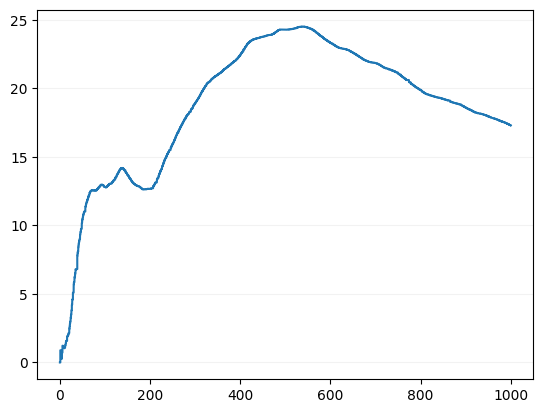

In [ ]:
people_time = 0
L = np.zeros(1)
for i in range(1, len(sim_time)):
    people_time += number_in_the_system[i-1] * (sim_time[i] - sim_time[i-1])
    L = np.append(L, people_time/sim_time[i])
plt.step(sim_time, L, where='post', label='Average Number in the System')
plt.grid(axis='y', color='0.95')
plt.show()

b) Using a controlling routine outside the queueing calculation function, loop through the values of $\frac{1}{λ}$ from 1.01 to 1.5 in steps of 0.01 and plot the results for Lq.  [3 pts]

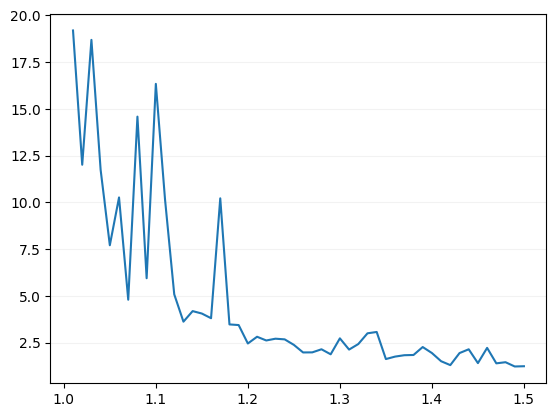

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def Customer_Arrival(arrival_time):
  global servers_idle_time
  #Change system state
  number_in_the_system.append(number_in_the_system[-1]+1)
  #Create record for customer just arriving
  customers.append(customer(event_queue[0].customer_ID, sim_time[-1], 0, 0))
  #Schedule the arrival for the next customer
  event_queue.append(event(sim_time[-1] + np.random.exponential(arrival_time), "Arrival", event_queue[0].customer_ID+1))
  #Arrival and immediate service
  if number_in_the_system[-1] <= servers:
    #print("Time: ", sim_time[-1], " Arrival with immediate service: ", event_queue[0].customer_ID)
    #Add the service_time to the customer's record
    customers[-1].service_time = sim_time[-1]
    #Schedule this customer's departure
    depart_time = sim_time[-1] + np.random.exponential(service_time)
    #print("    Customer", event_queue[0].customer_ID, "expected departure",depart_time)
    event_queue.append(event(depart_time, "Departure", event_queue[0].customer_ID))
    #Calculate idle time for serevers for every customer except the first
    if len(customers) > 1:
      servers_idle_time += (sim_time[-1] - sim_time[-2]) * (servers - number_in_the_system[-2])
  #Arrival and wait in the queue
  else:
    #print("Time: ", sim_time[-1], " Arrival, waiting in queue: ", event_queue[0].customer_ID)
    #Add customer to queue
    queue.append(event_queue[0].customer_ID)
    #Increment the number in the queue
    number_in_the_queue.append(number_in_the_queue[-1]+1)
    #Add the sim_time for plotting the queue length
    queue_time.append(sim_time[-1])

def Customer_Departure():
  global servers_idle_time
  #Change system state
  number_in_the_system.append(number_in_the_system[-1]-1)
  #Add the deparure time to the customer's record
  customers[event_queue[0].customer_ID].departure_time = sim_time[-1]
  #Departure with the next person in the queue served
  if number_in_the_system[-1] >= servers:
    #print("Time: ", sim_time[-1], " Departure: ", event_queue[0].customer_ID, " Serving: ", queue[0])
    #Add service time for customer who was in the queue
    customers[int(queue[0])].service_time = sim_time[-1]
    #Schedule the departure for this customer
    event_queue.append(event(sim_time[-1] + np.random.exponential(service_time), "Departure", queue[0]))
    #Remove this customer from the queue
    del queue[0]
    #Decrement the number in the queue
    number_in_the_queue.append(number_in_the_queue[-1]-1)
    #Add the sim_time for plotting the queue length
    queue_time.append(sim_time[-1])
  #Departure with the next person with no one in the queue
  else:
    #print("Time: ", sim_time[-1], " Departure: ", event_queue[0].customer_ID, " system empty")
    #Calculate idle time
    servers_idle_time += (sim_time[-1] - sim_time[-2]) * (servers - number_in_the_system[-2])

def Queueing_Simulation(arrival_time):
  #system state
  number_in_the_system.clear()
  number_in_the_system.append(0)

  #entity attributes
  customers.clear()

  #events
  event_queue.clear()
  event_queue.append(event(np.random.exponential(arrival_time), "Arrival", 0))

  #resource
  servers_idle_time = event_queue[0].sim_time * servers

  #sets
  queue.clear()
  number_in_the_queue.clear()
  number_in_the_queue.append(0)
  queue_time.clear()
  queue_time.append(0)

  #timing
  sim_time.clear()
  sim_time.append(0)

  np.random.seed(118)

  while event_queue[0].sim_time <= max_time:
    sim_time.append(event_queue[0].sim_time)
    match event_queue[0].event_type:
      case 'Arrival':
        Customer_Arrival(arrival_time)
      case 'Departure':
        Customer_Departure()
    #Delete event just processed
    del event_queue[0]
    #Sort the event queue
    event_queue.sort(key = lambda x : x.sim_time)

  last_arrived = customers[-1].customer_ID
  last_served = last_arrived
  while customers[last_served].service_time == 0:
    last_served -= 1
  sum_person_queue_time = sum(customers[c].service_time - customers[c].arrival_time for c in range(0,last_served))
  return sum_person_queue_time/customers[last_served].service_time

#system state
number_in_the_system = []

#resource
servers = 1
service_time = 1.0
servers_idle_time = 0

#entity attributes
class customer:
  def __init__(self, customer_ID, arrival_time, service_time, departure_time):
    self.customer_ID = int(customer_ID)
    self.arrival_time = arrival_time
    self.service_time = service_time
    self.departure_time = departure_time
customers = []

#sets
queue = []
number_in_the_queue = []
queue_time = []

#events
class event:
  def __init__(self, sim_time, event_type, customer_ID):
    self.sim_time = sim_time
    self.event_type = event_type
    self.customer_ID = int(customer_ID)
event_queue = []

#timing
max_time = 1000
sim_time = []

arr_time = []
Lq = []
for t in range(101, 151, 1):
  arr_time.append(t/100)
  Lq.append(Queueing_Simulation(t/100))

plt.plot(arr_time, Lq, label='Average Number in the System')
plt.grid(axis='y', color='0.95')
plt.show()

This plot show reinforces the need to extend the simulation or do samples for each set of parameters in order to get a smoother plot of the average queue length.

c) Change the arrival distribution to a beta distribution with parameters a = 0.5 and b = 0.5 (see the numpy.random.beta function). Note: unlike numpy.random.exponential, the numpy.random.beta function provides random numbers only on the interval (0, 1) and has the mean $\frac{a}{a+b}$. To get a beta distribution with mean M, it is necessary to multiply the numpy.random.beta function by $\frac{a+b}{a}$*M.  

We wish to compare the outcomes of the queueing model for the inerarrival times with the exponential distribution and with the beta distribution when their **means are equal**. Repeat the plot in b) and include a curve with the results from interarrivals with the beta districution.    [2 pts]

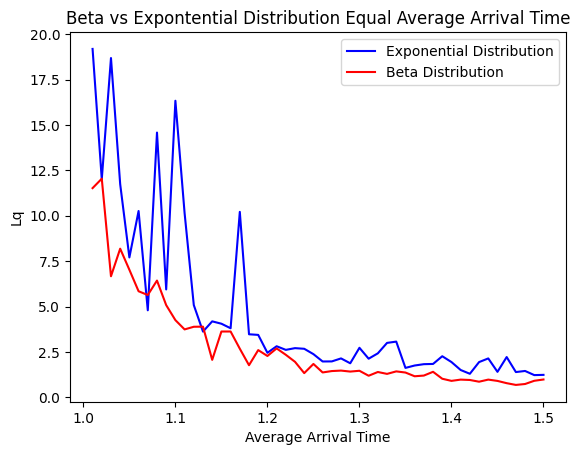

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def Customer_Arrival(arrival_time):
  global servers_idle_time
  #Change system state
  number_in_the_system.append(number_in_the_system[-1]+1)
  #Create record for customer just arriving
  customers.append(customer(event_queue[0].customer_ID, sim_time[-1], 0, 0))
  #Schedule the arrival for the next customer
  event_queue.append(event(sim_time[-1] + np.random.beta(0.5, 0.5)*2*arrival_time, "Arrival", event_queue[0].customer_ID+1))
  #Arrival and immediate service
  if number_in_the_system[-1] <= servers:
    #print("Time: ", sim_time[-1], " Arrival with immediate service: ", event_queue[0].customer_ID)
    #Add the service_time to the customer's record
    customers[-1].service_time = sim_time[-1]
    #Schedule this customer's departure
    depart_time = sim_time[-1] + np.random.exponential(service_time)
    #print("    Customer", event_queue[0].customer_ID, "expected departure",depart_time)
    event_queue.append(event(depart_time, "Departure", event_queue[0].customer_ID))
    #Calculate idle time for serevers for every customer except the first
    if len(customers) > 1:
      servers_idle_time += (sim_time[-1] - sim_time[-2]) * (servers - number_in_the_system[-2])
  #Arrival and wait in the queue
  else:
    #print("Time: ", sim_time[-1], " Arrival, waiting in queue: ", event_queue[0].customer_ID)
    #Add customer to queue
    queue.append(event_queue[0].customer_ID)
    #Increment the number in the queue
    number_in_the_queue.append(number_in_the_queue[-1]+1)
    #Add the sim_time for plotting the queue length
    queue_time.append(sim_time[-1])

def Customer_Departure():
  global servers_idle_time
  #Change system state
  number_in_the_system.append(number_in_the_system[-1]-1)
  #Add the deparure time to the customer's record
  customers[event_queue[0].customer_ID].departure_time = sim_time[-1]
  #Departure with the next person in the queue served
  if number_in_the_system[-1] >= servers:
    #print("Time: ", sim_time[-1], " Departure: ", event_queue[0].customer_ID, " Serving: ", queue[0])
    #Add service time for customer who was in the queue
    customers[int(queue[0])].service_time = sim_time[-1]
    #Schedule the departure for this customer
    event_queue.append(event(sim_time[-1] + np.random.exponential(service_time), "Departure", queue[0]))
    #Remove this customer from the queue
    del queue[0]
    #Decrement the number in the queue
    number_in_the_queue.append(number_in_the_queue[-1]-1)
    #Add the sim_time for plotting the queue length
    queue_time.append(sim_time[-1])
  #Departure with the next person with no one in the queue
  else:
    #print("Time: ", sim_time[-1], " Departure: ", event_queue[0].customer_ID, " system empty")
    #Calculate idle time
    servers_idle_time += (sim_time[-1] - sim_time[-2]) * (servers - number_in_the_system[-2])

def Queueing_Simulation(arrival_time):
  #system state
  number_in_the_system.clear()
  number_in_the_system.append(0)

  #entity attributes
  customers.clear()

  #events
  event_queue.clear()
  event_queue.append(event(np.random.beta(0.5, 0.5)*2*arrival_time, "Arrival", 0))

  #resource
  servers_idle_time = event_queue[0].sim_time * servers

  #sets
  queue.clear()
  number_in_the_queue.clear()
  number_in_the_queue.append(0)
  queue_time.clear()
  queue_time.append(0)

  #timing
  sim_time.clear()
  sim_time.append(0)

  np.random.seed(118)

  while event_queue[0].sim_time <= max_time:
    sim_time.append(event_queue[0].sim_time)
    match event_queue[0].event_type:
      case 'Arrival':
        Customer_Arrival(arrival_time)
      case 'Departure':
        Customer_Departure()
    #Delete event just processed
    del event_queue[0]
    #Sort the event queue
    event_queue.sort(key = lambda x : x.sim_time)

  last_arrived = customers[-1].customer_ID
  last_served = last_arrived
  while customers[last_served].service_time == 0:
    last_served -= 1
  sum_person_queue_time = sum(customers[c].service_time - customers[c].arrival_time for c in range(0,last_served))
  return sum_person_queue_time/customers[last_served].service_time

#system state
number_in_the_system = []

#resource
servers = 1
service_time = 1.0
servers_idle_time = 0

#entity attributes
class customer:
  def __init__(self, customer_ID, arrival_time, service_time, departure_time):
    self.customer_ID = int(customer_ID)
    self.arrival_time = arrival_time
    self.service_time = service_time
    self.departure_time = departure_time
customers = []

#sets
queue = []
number_in_the_queue = []
queue_time = []

#events
class event:
  def __init__(self, sim_time, event_type, customer_ID):
    self.sim_time = sim_time
    self.event_type = event_type
    self.customer_ID = int(customer_ID)
event_queue = []

#timing
max_time = 1000
sim_time = []

arr_time2 = []
Lq2 = []
for t in range(101, 151, 1):
  arr_time2.append(t/100)
  Lq2.append(Queueing_Simulation(t/100))

plt.title('Beta vs Expontential Distribution Equal Average Arrival Time')
plt.xlabel('Average Arrival Time')
plt.ylabel('Lq')
plt.plot(arr_time, Lq, "-b", label='Exponential Distribution')
plt.plot(arr_time2, Lq2, "-r", label="Beta Distribution")
plt.legend(loc="upper right")
plt.show()

d) Consider the case where 1/λ = 1.05.  Use the queueing simulation to fill out the following table. Explain, in general terms, why the shape of arrival distribution has the observed impact on the queueing model results. [3 points]

Distribution|a  |b  |L    |W    |Lq   |Wq   |ρ                  
------------|---|---|-----|-----|-----|-----|----
Exponential |-  |-  | 8.61| 8.91| 7.70| 7.96|0.92
Beta        |0.5|0.5| 7.96| 8.30| 7.03| 7.32|0.93
Beta        |5.0|1.0| 5.93| 6.32| 5.04| 5.36|0.90
Beta        |1.0|5.0|14.86|15.13|13.93|14.16|0.95

The beta(0.5,0.5) distribution is symmetric and bounded.  The right tail of the exponential distribution, then, yields a slightly more heavily loaded queueing system.  The beta(5.0, 1.0) is also bounded, but is left skewed.  Interarrival times will be longer thus creating a less heavily loaded queueing system.  Finally, the beta(1.0, 5.0) is bounded, but is right skewed.  Interarrival times will generally be shorter making the queueing system increasingly heavily loaded.

2) [10 points] In this problem, we will see what happens with different service time distributions. In each case, let the mean interarrival time ($\frac{1}{λ}$) be 2.0, the interarrival time distribution be exponential, and the number of servers (s) be one. Also, use a random number seed of 118 and run the simulation for 1,000 time units.

a) Use the exponential distribution for the service time and fill out this table and put your code below. [2 points]

$\frac{1}{μ}$  |L   |W    |Lq  |Wq   |ρ                    
---------------|----|-----|----|-----|----
1.00           |0.85| 1.63|0.37| 0.70|0.49
1.50           |2.97| 5.64|2.23| 4.24|0.74
1.90           |8.55|16.50|7.65|17.74|0.90
1.95           |7.67|15.06|6.78|13.28|0.90      


b) Using a controlling routine outside the queueing calculation function, loop through the values of $\frac{1}{μ}$ from 1.50 to 1.95 in steps of 0.01 and plot the results for Lq. [2 pts]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def Customer_Arrival(arrival_time):
  global servers_idle_time
  #Change system state
  number_in_the_system.append(number_in_the_system[-1]+1)
  #Create record for customer just arriving
  customers.append(customer(event_queue[0].customer_ID, sim_time[-1], 0, 0))
  #Schedule the arrival for the next customer
  event_queue.append(event(sim_time[-1] + np.random.exponential(arrival_time), "Arrival", event_queue[0].customer_ID+1))
  #Arrival and immediate service
  if number_in_the_system[-1] <= servers:
    #print("Time: ", sim_time[-1], " Arrival with immediate service: ", event_queue[0].customer_ID)
    #Add the service_time to the customer's record
    customers[-1].service_time = sim_time[-1]
    #Schedule this customer's departure
    depart_time = sim_time[-1] + np.random.exponential(service_time)
    #print("    Customer", event_queue[0].customer_ID, "expected departure",depart_time)
    event_queue.append(event(depart_time, "Departure", event_queue[0].customer_ID))
    #Calculate idle time for serevers for every customer except the first
    if len(customers) > 1:
      servers_idle_time += (sim_time[-1] - sim_time[-2]) * (servers - number_in_the_system[-2])
  #Arrival and wait in the queue
  else:
    #print("Time: ", sim_time[-1], " Arrival, waiting in queue: ", event_queue[0].customer_ID)
    #Add customer to queue
    queue.append(event_queue[0].customer_ID)
    #Increment the number in the queue
    number_in_the_queue.append(number_in_the_queue[-1]+1)
    #Add the sim_time for plotting the queue length
    queue_time.append(sim_time[-1])

def Customer_Departure():
  global servers_idle_time
  #Change system state
  number_in_the_system.append(number_in_the_system[-1]-1)
  #Add the deparure time to the customer's record
  customers[event_queue[0].customer_ID].departure_time = sim_time[-1]
  #Departure with the next person in the queue served
  if number_in_the_system[-1] >= servers:
    #print("Time: ", sim_time[-1], " Departure: ", event_queue[0].customer_ID, " Serving: ", queue[0])
    #Add service time for customer who was in the queue
    customers[int(queue[0])].service_time = sim_time[-1]
    #Schedule the departure for this customer
    event_queue.append(event(sim_time[-1] + np.random.exponential(service_time), "Departure", queue[0]))
    #Remove this customer from the queue
    del queue[0]
    #Decrement the number in the queue
    number_in_the_queue.append(number_in_the_queue[-1]-1)
    #Add the sim_time for plotting the queue length
    queue_time.append(sim_time[-1])
  #Departure with the next person with no one in the queue
  else:
    #print("Time: ", sim_time[-1], " Departure: ", event_queue[0].customer_ID, " system empty")
    #Calculate idle time
    servers_idle_time += (sim_time[-1] - sim_time[-2]) * (servers - number_in_the_system[-2])

def Queueing_Simulation(arrival_time):
  #system state
  number_in_the_system.clear()
  number_in_the_system.append(0)

  #entity attributes
  customers.clear()

  #events
  event_queue.clear()
  event_queue.append(event(np.random.exponential(arrival_time), "Arrival", 0))

  #resource
  servers_idle_time = event_queue[0].sim_time * servers

  #sets
  queue.clear()
  number_in_the_queue.clear()
  number_in_the_queue.append(0)
  queue_time.clear()
  queue_time.append(0)

  #timing
  sim_time.clear()
  sim_time.append(0)

  np.random.seed(118)

  while event_queue[0].sim_time <= max_time:
    sim_time.append(event_queue[0].sim_time)
    match event_queue[0].event_type:
      case 'Arrival':
        Customer_Arrival(arrival_time)
      case 'Departure':
        Customer_Departure()
    #Delete event just processed
    del event_queue[0]
    #Sort the event queue
    event_queue.sort(key = lambda x : x.sim_time)

  last_arrived = customers[-1].customer_ID
  last_served = last_arrived
  while customers[last_served].service_time == 0:
    last_served -= 1
  sum_person_queue_time = sum(customers[c].service_time - customers[c].arrival_time for c in range(0,last_served))
  return sum_person_queue_time/customers[last_served].service_time

#system state
number_in_the_system = []

#resource
servers = 1
service_time = 1.0
servers_idle_time = 0

#entity attributes
class customer:
  def __init__(self, customer_ID, arrival_time, service_time, departure_time):
    self.customer_ID = int(customer_ID)
    self.arrival_time = arrival_time
    self.service_time = service_time
    self.departure_time = departure_time
customers = []

#sets
queue = []
number_in_the_queue = []
queue_time = []

#events
class event:
  def __init__(self, sim_time, event_type, customer_ID):
    self.sim_time = sim_time
    self.event_type = event_type
    self.customer_ID = int(customer_ID)
event_queue = []

#timing
max_time = 1000
sim_time = []

ser_time = []
Lq = []
for t in range(150, 195, 1):
  ser_time.append(t/100)
  Lq.append(Queueing_Simulation(t/100))

plt.plot(arr_time, Lq, label='Average Number in the System')
plt.grid(axis='y', color='0.95')
plt.show()

c) Change the service time distribution to a uniform distribution with a lower bound 25% below the mean and an upper bound 25% above the mean.  We wish to compare the outcomes of the queueing model for the service times with the exponential distribution and with the uniform distribution when their means are equal. Repeat the plot in b) and include a curve with the results from service times with the uniform districution. [2 pts]

In [ ]:
Put your plot here

d) Now add a curve to the plot in c) where the service times are constant with the same vaule as the means of the other plots. Explain what you observe. [4 pts]

In [ ]:
Put your plot here

Put your explanation here.